In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val), 
                    batch_size=128)

In [ ]:
model.save('hdr.keras')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


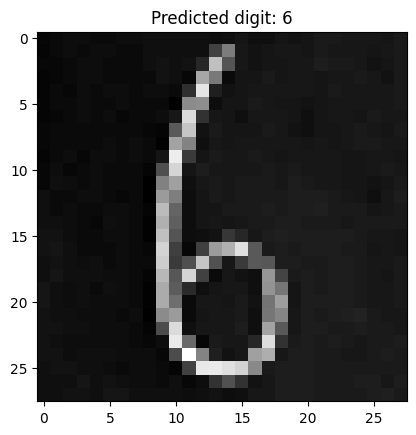

Predicted digit: 6


In [14]:
def predict_digit(image_path):
    model = keras.models.load_model('hdr.keras')
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((28, 28))
    img = np.array(img)
    img = 255 - img 
    img = img / 255.0
    img = img.reshape((1, 28, 28, 1))
    predictions = model.predict(img)
    digit = np.argmax(predictions[0])
    plt.imshow(img.reshape((28, 28)), cmap='gray')
    plt.title(f'Predicted digit: {digit}')
    plt.show()
    return digit

image_path = 'Test/6.jpg'  
predicted_digit = predict_digit(image_path)
print(f'Predicted digit: {predicted_digit}')